In [11]:
# Import Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Data Collection
stock_data = yf.download(tickers='JPM', start='2014-01-01', end='2023-12-31')
stock_data.dropna(inplace=True)

[*********************100%%**********************]  1 of 1 completed


In [3]:
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,103.798156,104.762746,102.837552,103.808406,91.459572,1.462349e+07
std,33.492832,33.807931,33.191395,33.499298,35.454965,6.532415e+06
min,53.080002,53.509998,50.070000,53.070000,40.358395,3.220500e+06
25%,67.142502,67.550003,66.647501,67.169998,53.212512,1.034375e+07
50%,105.680000,106.655003,104.524998,105.590000,90.540215,1.306650e+07
75%,131.264999,132.592499,130.007504,131.454998,121.134581,1.689385e+07
max,172.710007,172.960007,170.539993,171.779999,168.274734,5.619230e+07


In [4]:
print(stock_data.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


<function matplotlib.pyplot.show(close=None, block=None)>

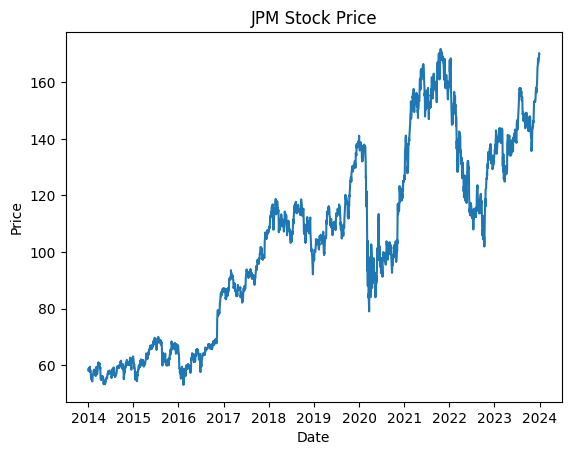

In [5]:
# Visualize Data
plt.plot(stock_data['Close'])
plt.title('JPM Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show

In [6]:
features = stock_data[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
target = stock_data['Close']

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [8]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [9]:
Y_pred = model.predict(X_test)

In [13]:
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.3132566039849643


In [14]:
comparison_df = pd.DataFrame({'Actual_Price': Y_test.values, 'Predicted_Price': Y_pred})
comparison_df.index = X_test.index
comparison_df

,Actual_Price,Predicted_Price
Date,,
2016-06-15,61.970001,62.521426
2017-09-07,88.529999,88.529452
2017-09-28,95.379997,95.198594
2017-11-10,97.510002,97.870235
2021-10-26,171.399994,171.657340
...,...,...
2014-03-18,58.060001,57.969086
2021-09-10,157.360001,158.055027
2015-12-18,64.400002,64.762709


**Final Analysis:** Predicting future stock prices using machine learning techniques is notoriously challenging due to the highly dynamic and volatile nature of financial markets. Stock prices are influenced by a myriad of factors, including economic indicators, company performance, investor sentiment, geopolitical events, and unexpected market disruptions, all of which can change rapidly and unpredictably. Machine learning models, which rely on historical data to make predictions, often struggle to account for these complex and often non-linear relationships. Additionally, the presence of noise in stock price data and the potential for overfitting make it difficult to create models that generalize well to new, unseen data. Consequently, while machine learning can provide valuable insights and assist in decision-making, it remains an inherently uncertain tool for accurately forecasting future stock prices.